### Fase 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes cuestiones usando la mejor gráfica que consideres.

In [17]:
#Importo las librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
sys.path.append("../")

#Configuro el DF.
pd.set_option('display.max_columns', None) 

In [18]:
#Abro el csv CLIENTES.
archivo_csv = '/Users/Tania_1/Desktop/ADALAB/MODULO_3/bda-modulo-3-evaluacion-final-TaniaGraff/data/output_data/customer_combined.csv'
df = pd.read_csv(archivo_csv)
df.head()

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month
0,100018,2017,January,3,0,3,1521,152.0,0.0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August
1,100018,2017,February,2,2,4,1320,132.0,0.0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August
2,100018,2018,October,6,4,10,3110,311.0,385.0,31,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August
3,100018,2017,April,4,0,4,924,92.0,0.0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August
4,100018,2017,May,0,0,0,0,0.0,0.0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

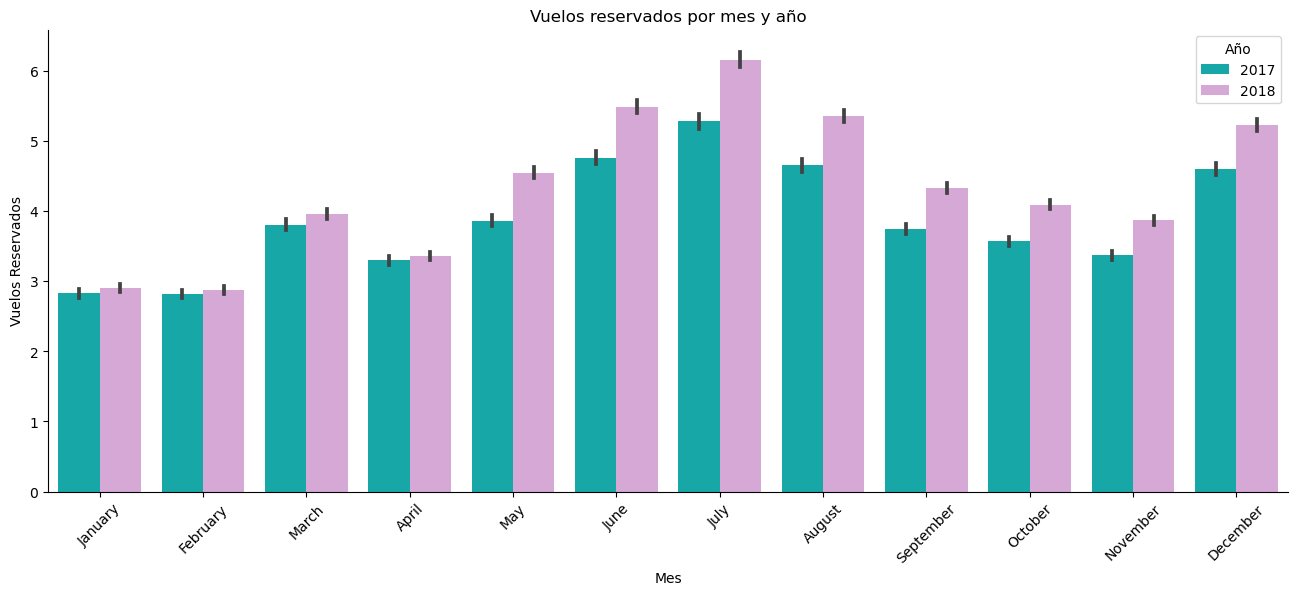

In [9]:
#Como son dos columnas numéricas y una categórica uso un gráfico de barras o barplot.
colores = ['c', 'plum']
orden = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']


plt.figure(figsize=(16, 6))
sns.barplot(x='Month', y='Flights_Booked', hue='Year', data=df, palette=colores, order=orden)
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')
plt.title('Vuelos reservados por mes y año')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

**Observaciones** La reserva de vuelos parece seguir la misma tendencia en 2017 y 2018, aumentando notablemente durante los meses centrales del año, coincidiendo con el periodo estival, y a final de año, especialmente durante el mes de diciembre. También hay un ligero ascenso en marzo, coincidiendo con el Sprint Break. Aunque en los dos años se aprecia la misma tendencia, el volumen de vuelos reservados es generalmente superior en 2018 que en 2017.

2. ¿Existe una relación entre la distancia de los vuelos y lospuntos acumulados por los clientes?

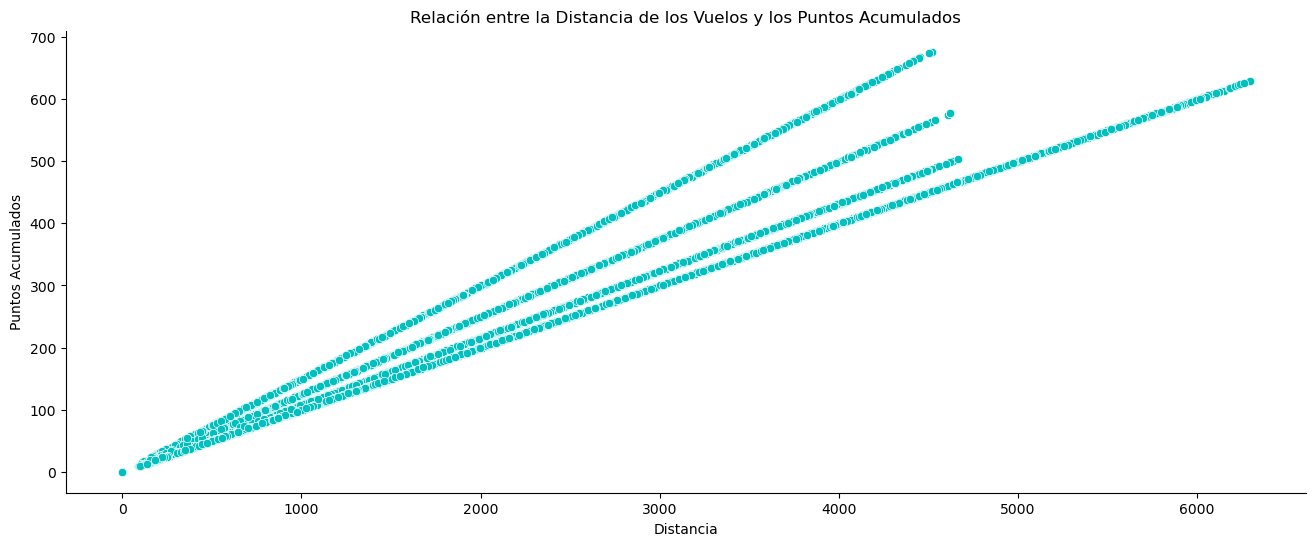

In [8]:
#Como quiero ver si existe una relación entre dos variables numéricas uso un scaterplot.
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Distance', y='Points_Accumulated', data=df, color='c')
plt.xlabel('Distancia')
plt.ylabel('Puntos Acumulados')
plt.title('Relación entre la Distancia de los Vuelos y los Puntos Acumulados')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

**Observaciones** A medida que aumenta la distancia o millas de vuelo, aumenta la cantidad de puntos acumulados de una forma notablemente significativa, así que podemos deducir que ambas variables están estrechamente relacionadas.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

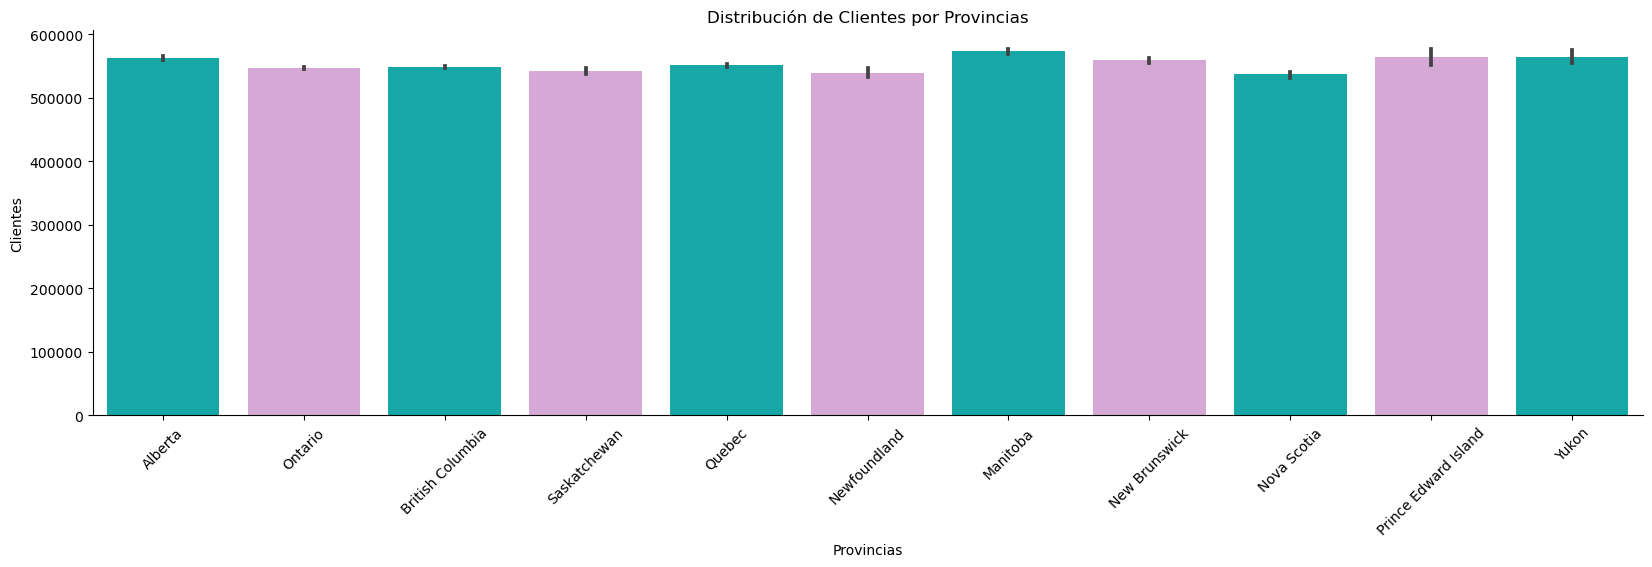

In [10]:
#Vuelvo a usar un barplot para ver la distribución de una variable númerica en función de las categorías o valores únicos de una variable categórica.
colores=['c', 'plum']

plt.figure(figsize=(20, 5))
sns.barplot(x='Province', y='Loyalty_Number', data=df, palette= colores)
plt.xlabel('Provincias')
plt.ylabel('Clientes')
plt.title('Distribución de Clientes por Provincias')
plt.xticks(rotation=45)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);


**Observaciones** La distribución de clientes por provincias parece ser bastante uniforme, sin ninguna provincia que destaque significativamente sobre las demás. Esto sugiere que los clientes de la compañía aérea no se concentran en una región específica, sino que están distribuidos por toda la geografía canadiense. 

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

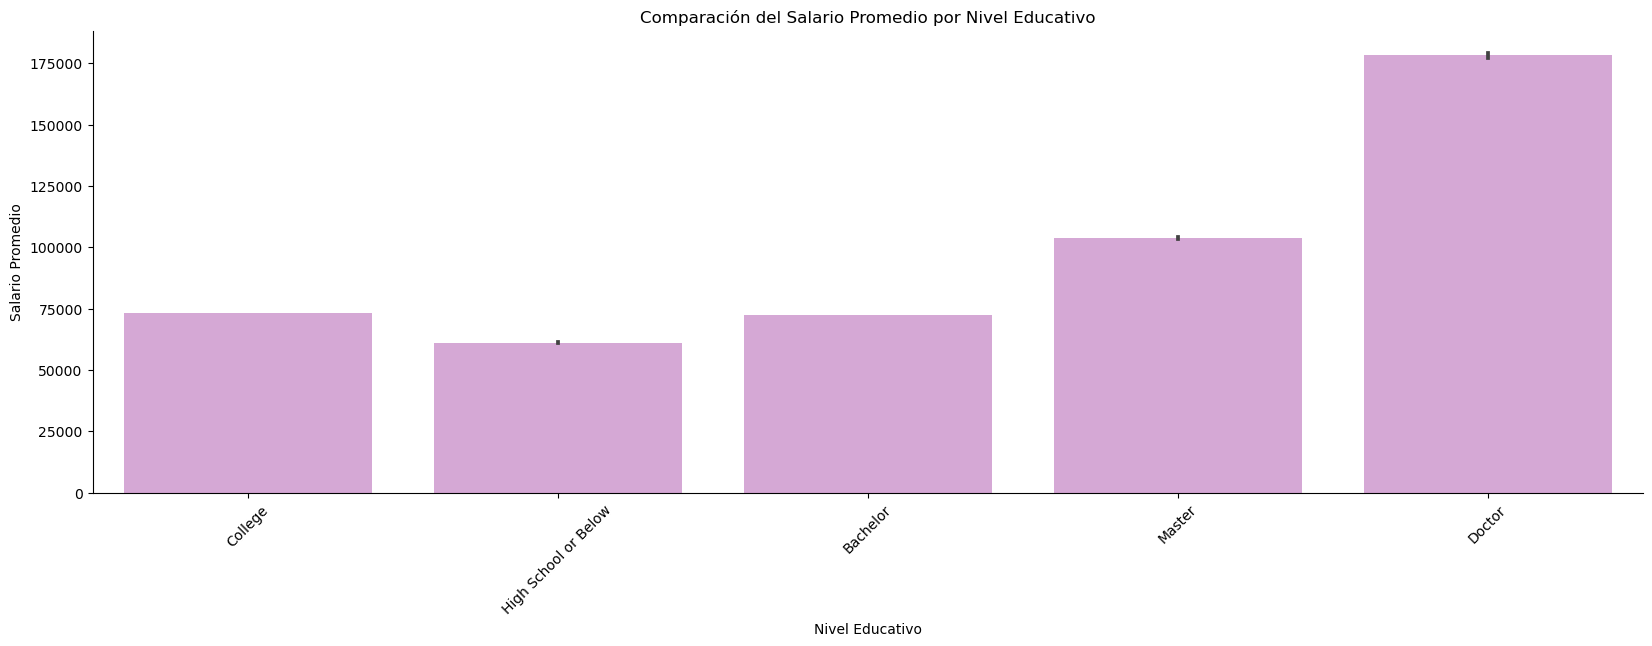

In [21]:
#Vuelvo a usar un gráfico de barras o barplot para hacer esta comparación.
orden = ['College', 'High School or Below', 'Bachelor', 'Master', 'Doctor']

plt.figure(figsize=(20, 6))
sns.barplot(x='Education', y='Salary', data=df, color='plum', order=orden)
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.title('Comparación del Salario Promedio por Nivel Educativo')
plt.xticks(rotation=45)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

**Observaciones** El análisis del salario promedio muestra una clara tendencia ascendente a medida que aumenta el nivel educativo de los clientes. Esta tendencia sugiere que hay una clara relación entre el nivel educativo y el salario percibido, donde los niveles más altos de educación están asociados a mayores ingresos.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

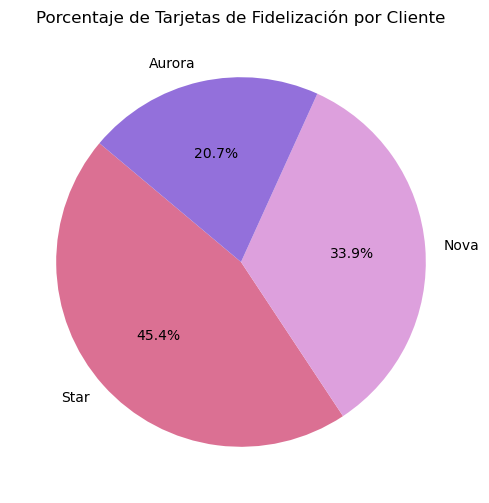

In [37]:
#Uso un pieplot o gráfico de quesitos para vizualizar esta proporción, calculando el porcentaje de clientes que hay por cada tarjeta (ya que la columna Loyalty_Number es un interger).
clientes_por_tarjeta = df['Loyalty_Card'].value_counts(normalize=True) * 100

labels = clientes_por_tarjeta.index
sizes = clientes_por_tarjeta.values
colors = ['palevioletred', 'plum', 'mediumpurple']

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Porcentaje de Tarjetas de Fidelización por Cliente');

**Observaciones** Casi la mitad de los clientes (48.2%) tienen la tarjeta Star, seguida de la tarjeta Nova (30.1%) y la tarjeta Aurora (21.7%). Para determinar qué tarjeta podría considerarse más "premium", sería útil analizar otras métricas como el salario promedio y el historial de puntos acumulados y canjeados, lo cual podría proporcionar una mejor comprensión del perfil socioeconómico y las ventajas asociadas con cada tarjeta.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

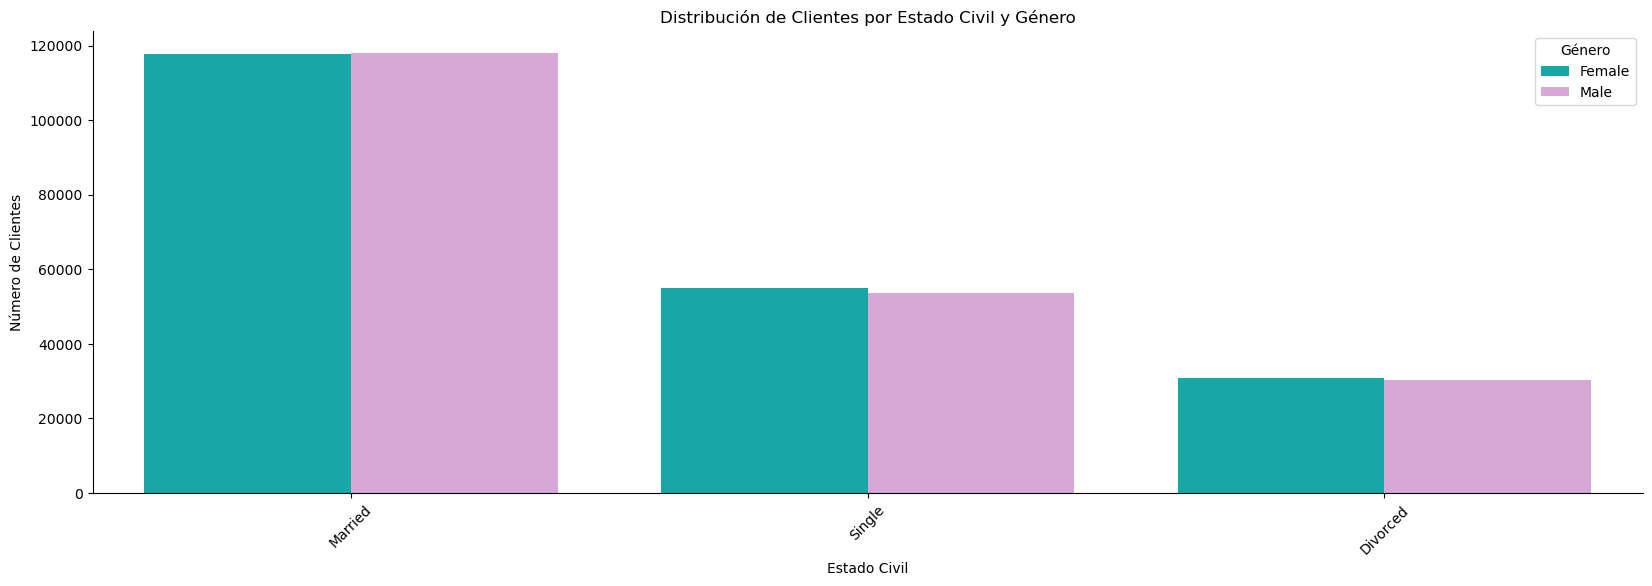

In [8]:
colors = ['c', 'plum']

plt.figure(figsize=(20, 6))
sns.countplot(x='Marital_Status', hue='Gender', data=df, palette=colors)
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

**Observaciones** La mayoría de clientes están casados y se observa una distribución prácticamente uniforme de sexos en función del estado civil, indicando que no hay una prevalencia notable de un género sobre el otro en ningún estado civil.